In [2]:
from chemkin_CS207_G9.Reaction import Reaction
from chemkin_CS207_G9.ReactionSystem import ReactionSystem
from chemkin_CS207_G9.database_query import CoeffQuery

In [3]:
import os
import chemkin_CS207_G9
BASE_DIR = os.path.dirname(os.path.abspath(chemkin_CS207_G9.__file__))

path_xml = os.path.join(BASE_DIR, 'rxns_reversible.xml') # path to the .xml file
path_sql = os.path.join(BASE_DIR, 'nasa_thermo.sqlite')  # path to the .sqlite file

In [4]:
nasa_query = CoeffQuery(path_sql)

In [5]:
import sqlite3

In [6]:
db = sqlite3.connect(path_sql)
cursor = db.cursor()

In [7]:
query = '''SELECT * FROM LOW'''
cursor.execute(query).fetchall()

[('O',
  200.0,
  1000.0,
  3.1682671,
  -0.00327931884,
  6.64306396e-06,
  -6.12806624e-09,
  2.11265971e-12,
  29122.2592,
  2.05193346),
 ('O2',
  200.0,
  1000.0,
  3.78245636,
  -0.00299673416,
  9.84730201e-06,
  -9.68129509e-09,
  3.24372837e-12,
  -1063.94356,
  3.65767573),
 ('H',
  200.0,
  1000.0,
  2.5,
  7.05332819e-13,
  -1.99591964e-15,
  2.30081632e-18,
  -9.27732332e-22,
  25473.6599,
  -0.446682853),
 ('H2',
  200.0,
  1000.0,
  2.34433112,
  0.00798052075,
  -1.9478151e-05,
  2.01572094e-08,
  -7.37611761e-12,
  -917.935173,
  0.683010238),
 ('OH',
  200.0,
  1000.0,
  3.99201543,
  -0.00240131752,
  4.61793841e-06,
  -3.88113333e-09,
  1.3641147e-12,
  3615.08056,
  -0.103925458),
 ('H2O',
  200.0,
  1000.0,
  4.19864056,
  -0.0020364341,
  6.52040211e-06,
  -5.48797062e-09,
  1.77197817e-12,
  -30293.7267,
  -0.849032208),
 ('HO2',
  200.0,
  1000.0,
  4.30179801,
  -0.00474912051,
  2.11582891e-05,
  -2.42763894e-08,
  9.29225124e-12,
  294.80804,
  3.71666245),


In [8]:
from chemkin_CS207_G9.xml2dict import xml2dict

reader = xml2dict()
reader.parse(path_xml)
info = reader.get_info()

In [9]:
species = info[0]
reactions = [Reaction(**r) for r in info[1]]

print(info[1])

[{'coeffParams': {'A': 3547000000000000.0, 'b': -0.406, 'E': 16599.0}, 'ID': 'reaction01', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'H': 1, 'O2': 1}, 'products': {'O': 1, 'OH': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 50800.0, 'b': 2.67, 'E': 6290.0}, 'ID': 'reaction02', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'O': 1, 'H2': 1}, 'products': {'H': 1, 'OH': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 216000000.0, 'b': 1.51, 'E': 3430.0}, 'ID': 'reaction03', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'H2': 1, 'OH': 1}, 'products': {'H2O': 1, 'H': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 2970000.0, 'b': 2.02, 'E': 13400.0}, 'ID': 'reaction04', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'O': 1, 'H2O': 1}, 'products': {'OH': 2}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 16600000000000.0, 'E': 823.0}, 'ID': 'reaction05', 'reversible': 'yes', 'TYPE': 'Elementary', 're

In [10]:
import graphviz 
from graphviz import Digraph
dot_b = Digraph(comment='Bipartite Graph')

In [11]:
with dot_b.subgraph(name='cluster_1') as c:
    c.attr(style='filled')
    c.attr(label='Reaction', labelloc = 'b')
    c.attr(color='lightgrey')
    for idx, r in enumerate(reactions):
        c.node(str(idx))

In [12]:
with dot_b.subgraph(name='cluster_0') as c:
    c.node_attr.update(style='filled')
    c.attr(color='blue')
    c.attr(label='Species')
    for s in species:
        c.node(s)

In [13]:
for idx, r in enumerate(reactions):
    for k1 in r.getReactants():
        dot_b.edge(k1, str(idx))
    for k2 in r.getProducts():
        dot_b.edge(str(idx), k2)

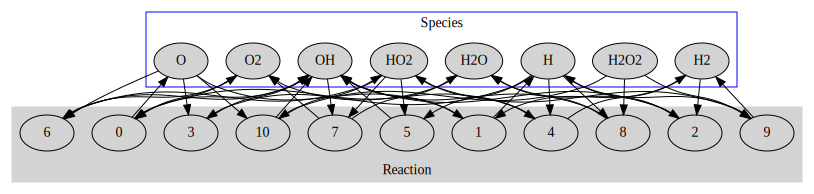

In [14]:
dot_b

In [29]:
dot

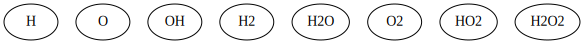

In [31]:
dot

In [104]:
styles = {
    'graph': {
        'label': 'A Fancy Graph',
        'fontsize': '16',
        'fontcolor': 'white',
        'bgcolor': '#333333',
        'rankdir': 'BT',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'hexagon',
        'fontcolor': 'white',
        'color': 'white',
        'style': 'filled',
        'fillcolor': '#006699',
    },
    'edges': {
        'style': 'dashed',
        'color': 'white',
        'arrowhead': 'open',
        'fontname': 'Courier',
        'fontsize': '12',
        'fontcolor': 'white',
    }
}



import graphviz 
from graphviz import Digraph
dot = Digraph(comment='Hierarchical Graph')
for s in species:
    dot.node(s)
for r in reactions:
    for idx, k1 in enumerate(r.getReactants().keys()):
        for i,k in enumerate( r.getProducts() ):
            dot.edge(k1, k, color = "0, 0, 0")
        for jdx, k2 in enumerate(r.getReactants().keys()):
            if k1 != k2 and jdx > idx:
                dot.edge(k1, k2, arrowhead = 'none')   
                
dot.graph_attr.update(('edges' in styles and styles['edges']) or {})

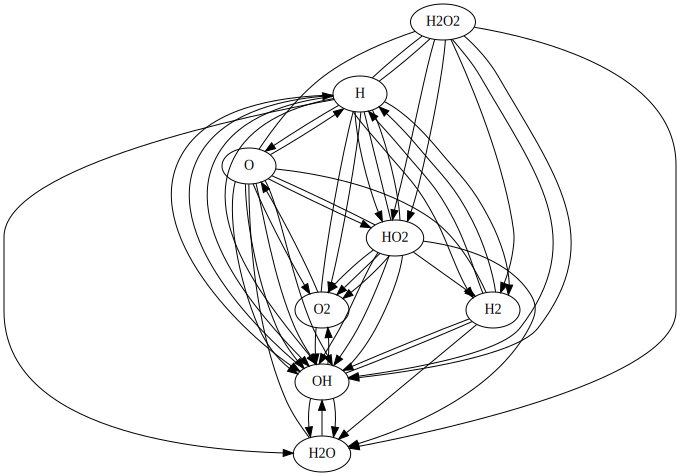

In [105]:
dot